# Assignment #3

# 1. K-means from scratch (25 points)

Code up the K-means algorithm. To test your code, sample from the three bivariate Gaussian distributions provided below and find three clusters from this sampled data. To initialize your algorihtm, you may use the initial centroids defined below. After predicting the cluster to which each data point belongs, make a scatter plot similar to the one shown below. For consistency, set the random seed to 1 before sampling from the three bivariate Gaussian distributions.

* Bivariate Gaussians
$$\mathbf{\mu_1} = \begin{bmatrix}
3.0\\
0.0\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-6.0\\
3.0\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-5.0\\
-2.0\\
\end{bmatrix}$$

$$\mathbf{\Sigma_1} = \mathbf{\Sigma_2} = \mathbf{\Sigma_3} = \begin{bmatrix}
1.0&0.5\\
0.5&1.0\\
\end{bmatrix}$$

* Initial centroids:
$$\mathbf{c_1} = \begin{bmatrix}
0.4\\
0.3\\
\end{bmatrix}$$

$$\mathbf{c_2} = \begin{bmatrix}
0.1\\
0.4\\
\end{bmatrix}$$

$$\mathbf{c_3} = \begin{bmatrix}
-2.0\\
2.0\\
\end{bmatrix}$$

* Example of final scatter plot

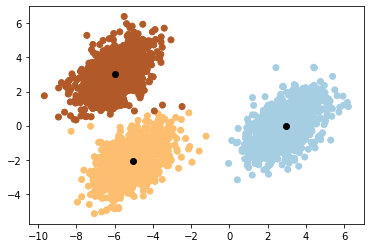

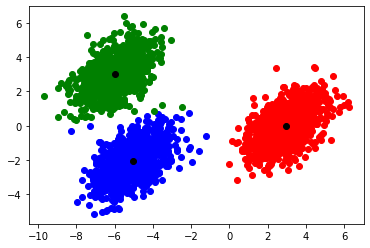

In [1]:
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt

# calculate Euclidean distance
def euclDistance(vector1, vector2):
    return np.sqrt(np.sum(np.power(vector2 - vector1, 2)))
 
# init centroids with random samples
def initCentroids(dataset, k):
    numsamples, dim = dataset.shape
    centroids = np.zeros((k, dim))
    centroids[0,:] = 0.4, 0.3
    centroids[1,:] = 0.1, 0.4
    centroids[2,:] = -2.0, 2.0
    return centroids
 
# k-means cluster
def kmeans(dataset, k):
    numsamples = dataset.shape[0]
    # first column stores which cluster this sample belongs to,
    # second column stores the error between this sample and its centroid
    clusterAssment = np.mat(np.zeros((numsamples, 2)))
    clusterChanged = True
 
    ## step 1: init centroids
    centroids = initCentroids(dataset, k)

    while clusterChanged:
        clusterChanged = False
        ## for each sample
        for i in range(numsamples):
            minDist  = 100000
            minIndex = 0
            ## for each centroid
            ## step 2: find the centroid who is closest
            for j in range(k):
                distance = euclDistance(centroids[j, :], dataset[i, :])
                if distance < minDist:
                    minDist  = distance
                    minIndex = j

            ## step 3: update its cluster
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
                clusterAssment[i, :] = minIndex, minDist**2
 
        ## step 4: update centroids
        for j in range(k):
            pointsInCluster = dataset[np.nonzero(clusterAssment[:, 0].A == j)[0]]
            centroids[j, :] = np.mean(pointsInCluster, axis = 0)
 
    return centroids, clusterAssment
 
# show your cluster only available with 2-D data
def showCluster(dataset, k, centroids, clusterAssment):
    numsamples, dim = dataset.shape

    mark = ['or', 'ob', 'og']

    # draw all samples
    for i in range(numsamples):
        markIndex = int(clusterAssment[i, 0])
        plt.plot(dataset[i, 0], dataset[i, 1], mark[markIndex])

    # draw the centroids
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], 'ko', markersize = 6)

    plt.show()

# sample from the three bivariate Gaussian distributions
np.random.seed(1)
mean = np.array([3.0,0.0])
cov = np.array([[1.0,0.5],[0.5,1.0]])
X0 = np.random.multivariate_normal(mean,cov,1000)
mean = np.array([-6.0,3.0])
cov = np.array([[1.0,0.5],[0.5,1.0]])
X1 = np.random.multivariate_normal(mean,cov,1000)
mean = np.array([-5.0,-2.0])
cov = np.array([[1.0,0.5],[0.5,1.0]])
X2 = np.random.multivariate_normal(mean,cov,1000)
X = np.concatenate((X0,X1,X2),axis=0)

# plot
dataset = np.mat(X)
k = 3
centroids, clusterAssment = kmeans(dataset, k)
showCluster(dataset, k, centroids, clusterAssment)

# 2. Choosing the appropriate clustering approach (25 points)

The file `/data/HydroLakes/watermask_46.4_46.5_-96_-95.9.tif` is a map of lakes in the bounding box minlon = -96, maxlon = -95.9, minlat = 46.4, and maxlat = 46.5 at a 30 meter spatial resolution. All pixels that belong to a lake are assigned 1 while every pixel that is not part of a lake is set to 0. In this problem we will use cluster analysis to group together contiguous pixels to uniquely define all the lakes in the map. 

**A.** After reading in and preprocessing the data for use in cluster analysis, use the following cluster algorithms with the given associated parameters to cluster the data:


    * Agglomerative Clustering with single linkage (n_clusters=25)
    * DBSCAN (eps = 5, min_samples = 10)
    * K-Means (n_clusters = 25)
    * Gaussian Mixture Model (n_components = 25)


**B.** Provide a scatter plot of the results of each algorithm. The color of each point on the scatter plot should be associated with a cluster. 


**C.** Discuss the results with an emphasis on explaining the strengths and deficiencies of each algorithm in the context of clustering the lakes. 


**D.** Having clustered the pixels into unique lakes, compute and report the mean and standard deviation of the area of the lakes. 

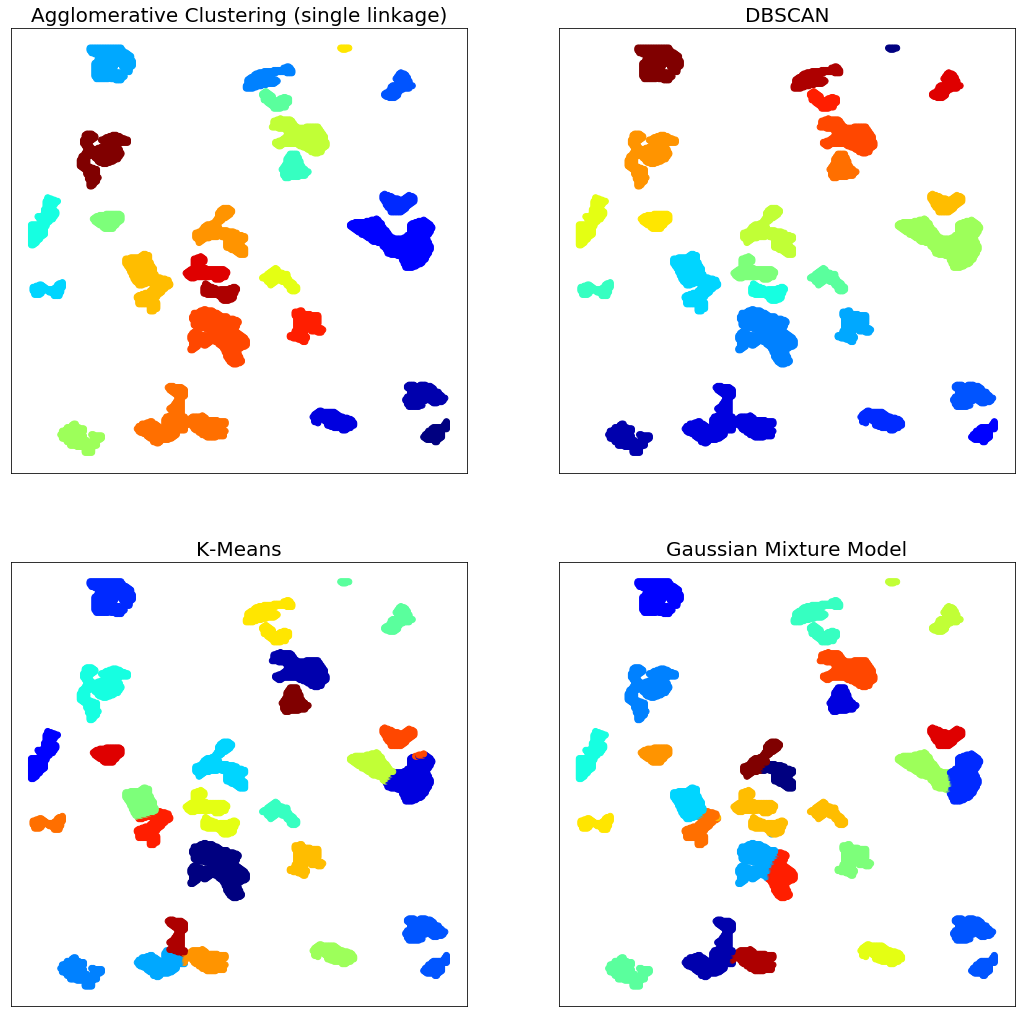

In [2]:
# A and B
import rasterio
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
lake = rasterio.open('/data/HydroLakes/watermask_46.4_46.5_-96_-95.9.tif').read(1)[:,:]
#plt.figure(figsize=(15,15))
#plt.imshow(lake,cmap='terrain')
#plt.xticks([])
#plt.yticks([])
#cb = plt.colorbar(orientation='horizontal',shrink=0.8,pad=0.02)
#cb.ax.tick_params(labelsize=35)
#plt.title('Elevation (m)',fontsize=50)
#plt.tight_layout()
#plt.show()

x = []
for i in range(lake.shape[0]):
    a = lake.shape[0] - i - 1
    for j in range(lake.shape[1]):
        if lake[a,j] == 1:
            x.append([i,j])
X = np.array(x)

import sklearn.mixture
# Agglomerative Clustering with single linkage (n_clusters=25)
k = 25
model = sklearn.cluster.AgglomerativeClustering(n_clusters=k,linkage='single')
#Predict the clusters on all the data
clusters1 = model.fit_predict(X)
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.title('Agglomerative Clustering (single linkage)',fontsize=20)
plt.scatter(X[:,1],X[:,0],c=clusters1,cmap=plt.get_cmap('jet'))
plt.xticks([])
plt.yticks([])

# DBSCAN (eps = 5, min_samples = 10)
model = sklearn.cluster.DBSCAN(eps = 5, min_samples = 10)
#Predict the clusters on all the data
clusters2 = model.fit_predict(X)
plt.subplot(2,2,2)
plt.title('DBSCAN',fontsize=20)
plt.scatter(X[:,1],X[:,0],c=clusters2,cmap=plt.get_cmap('jet'))
plt.xticks([])
plt.yticks([])

# K-Means (n_clusters = 25)
k = 25
model = sklearn.cluster.KMeans(n_clusters=k)
#Fit the model
model.fit(X)
#Predict the clusters on all the data
clusters3 = model.predict(X)
plt.subplot(2,2,3)
plt.title('K-Means',fontsize=20)
plt.scatter(X[:,1],X[:,0],c=clusters3,cmap=plt.get_cmap('jet'))
#plt.scatter(model.cluster_centers_[:,1],model.cluster_centers_[:,0],c='k',s=100)
#plt.axis('equal')
plt.xticks([])
plt.yticks([])

# Gaussian Mixture Model (n_components = 25)
k = 25
model = sklearn.mixture.GaussianMixture(n_components=k)
#Fit the model
model.fit(X)
#Predict the clusters on all the data
clusters4 = model.predict(X)
plt.subplot(2,2,4)
plt.title('Gaussian Mixture Model',fontsize=20)
plt.scatter(X[:,1],X[:,0],c=clusters4,cmap=plt.get_cmap('jet'))
#plt.scatter(model.means_[:,1],model.means_[:,0],c='k',s=100)
#plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
# C
print('    As we can see from 4 figures shown above, agglomerative clustering with single linkage and DBSCAN algorithms successfully clustered the pixels into unique lakes while K-mean and Gaussian Mixture Model algorithms failed, dividing contiguous pixels into several parts. Although K-mean algorithm is computationally efficient, it is unsuitable for non-spherical shapes, like lakes. Gaussian Mixture Model algorithm got the similar results as K-mean algorithm. Gaussian Mixture Model algorithm does fit some clusters to non-spherical shapes, but it is unable to handle non-elliptical shapes, especially those shapes with negative curvature. Agglomerative clustering with single linkage algorithm, as a hierarchical clustering technique, performs well in clustering different shapes and sizes, like lakes in this question. But one of its shortcoming is that the results from agglomerative clustering is a little bit subjective. And for DBSCAN algorithm, it is a density-based algorithm. It is resistant to noise and good at handling clusters of different shapes and sizes while it may fail when handle clusters with quite different densities.')

    As we can see from 4 figures shown above, agglomerative clustering with single linkage and DBSCAN algorithms successfully clustered the pixels into unique lakes while K-mean and Gaussian Mixture Model algorithms failed, dividing contiguous pixels into several parts. Although K-mean algorithm is computationally efficient, it is unsuitable for non-spherical shapes, like lakes. Gaussian Mixture Model algorithm got the similar results as K-mean algorithm. Gaussian Mixture Model algorithm does fit some clusters to non-spherical shapes, but it is unable to handle non-elliptical shapes, especially those shapes with negative curvature. Agglomerative clustering with single linkage algorithm, as a hierarchical clustering technique, performs well in clustering different shapes and sizes, like lakes in this question. But one of its shortcoming is that the results from agglomerative clustering is a little bit subjective. And for DBSCAN algorithm, it is a density-based algorithm. It is resistant

In [4]:
# D 

In [5]:
%%bash
gdalinfo /data/HydroLakes/watermask_46.4_46.5_-96_-95.9.tif

Driver: GTiff/GeoTIFF
Files: /data/HydroLakes/watermask_46.4_46.5_-96_-95.9.tif
Size is 257, 371
Coordinate System is:
PROJCS["unnamed",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.2572221010042,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",46.4],
    PARAMETER["standard_parallel_2",46.5],
    PARAMETER["latitude_of_center",46.45],
    PARAMETER["longitude_of_center",-95.95],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (-3845.160099685305340,5559.245071119172280)
Pixel Size = (30.000000000000000,-30.000000000000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERL

pj_obj_create: Open of /opt/conda/share/proj failed


In [6]:
print('The projection of lakes is Albers conical equal area, thus, the area of each pixel is 30 * 30 = 900 square meters.')

The projection of lakes is Albers conical equal area, thus, the area of each pixel is 30 * 30 = 900 square meters.


In [7]:
import statistics
# Agglomerative Clustering with single linkage (n_clusters=25)
lake1 = [0 for n in range(25)]
for i in range(len(clusters1)):
    lake1[clusters1[i]] = lake1[clusters1[i]] + 1
mean1 = sum(lake1) / len(lake1) * 30 * 30
std1 = statistics.stdev(lake1) * 30 * 30
print('    After using Agglomerative Clustering with single linkage algorithm to cluster the pixels into unique lakes, the calculated mean and standard deviation of the area of the lakes are', mean1, 'square meters and',std1,'meters, respectively.')
# DBSCAN (eps = 5, min_samples = 10)
lake2 = [0 for n in range(25)]
for i in range(len(clusters2)):
    if clusters1[i] == -1:
        clusters1[i] = 24
    lake2[clusters1[i]] = lake2[clusters1[i]] + 1
mean2 = sum(lake2) / len(lake2) * 30 * 30
std2 = statistics.stdev(lake2) * 30 * 30
print('    After using DBSCAN algorithm to cluster the pixels into unique lakes, the calculated mean and standard deviation of the area of the lakes are', mean2, 'square meters and',std2,'meters, respectively.')
print('    Therefore, the mean and standard deviation of the area of the lakes are', mean1, 'square meters and',std1,'meters, respectively.')

    After using Agglomerative Clustering with single linkage algorithm to cluster the pixels into unique lakes, the calculated mean and standard deviation of the area of the lakes are 308592.0 square meters and 231937.10699239137 meters, respectively.
    After using DBSCAN algorithm to cluster the pixels into unique lakes, the calculated mean and standard deviation of the area of the lakes are 308592.0 square meters and 231937.10699239137 meters, respectively.
    Therefore, the mean and standard deviation of the area of the lakes are 308592.0 square meters and 231937.10699239137 meters, respectively.


# 3. Predicting soil taxonomy (50 pts)

In the United States, soils are classified using the [USDA soil taxonomy](https://www.nrcs.usda.gov/Internet/FSE_DOCUMENTS/nrcs142p2_051232.pdf). Within the USDA soil taxonomy, the most general level is the taxonomic order. In this problem we will be using a suite of decision-tree based classification algorithms to create spatial maps of taxonomic order over western Illinois. The point observations come from the [NASIS database](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/soils/survey/tools/?cid=nrcs142p2_053552) while the environmental predictors come from Sentinel 2, the National Elevation Data, and the National Land Cover database.

All the data has already been subsetted and preprocessed and are available in the following NetCDF file `/data/HW/HW3/HW3.nc`. The file is split into two groups: predictors and observations. The predictors group contains a set of 1 arcsec maps for the domain and the observations group contains the in-situ taxonomic order observations with their associated geographic coordinates. Although not required, we recommend using xarray to read in these data. 

**A.** Read in and create maps of all the predictors. Describe any apparent discrepancies in spatial resolution between the maps.

**B.** Read in the in-situ observations and assemble the corresponding predictors for each site. Create the $\mathbf{X}$ array of predictors and the $\mathbf{y}$ array of observed taxonomic orders. Note that you will need to convert the taxonomic order names to integers.

**C.** Use the validation set approach to divide your data into training and test datasets. Each dataset should contain 50% of the data. Then fit a Decision tree using the training data and evaluate its accuracy for both the training and test datasets. Explain the differences in accuracy when evaluating the training and test datasets. To ensure reproduceability, when initializing the decision tree, set the random_state to 1.

**D.** Using  all the site data, perform a 10-fold cross validation of the decision tree and compare the results to the previous exercise. Set random_state to 1 and set shuffle to True.

**E.** Setting the number of decision trees to 100, perform a 10-fold cross validation using Bagging, Random Forests, and Gradient Boosting. Discuss how the results of these different ensemble methods vary amongst themselves. Also compare the results to those obtained from a single decision tree. Remember to set random_state to 1.

**F.** Using 100 trees, fit a Random Forest to the entire sites dataset and report the out of bag score. Compare that result to that obtained from the cross validation. Explain what the out of bag score is and how it can be more useful than cross validation. Remember to set random_state to 1.

**G.** Iterate through the number of decision trees varying from 1 to 100 in 1 tree increments. For each iteration, fit a Random Forest and append the corresponding out of bag score to a list. Plot the out of bag score as a function of the number of decision trees. What do you learn about the optimal number of trees for this problem?

**H.** After fitting a random forest with 100 trees, plot a map of the entire region of the predicted taxonomy order.

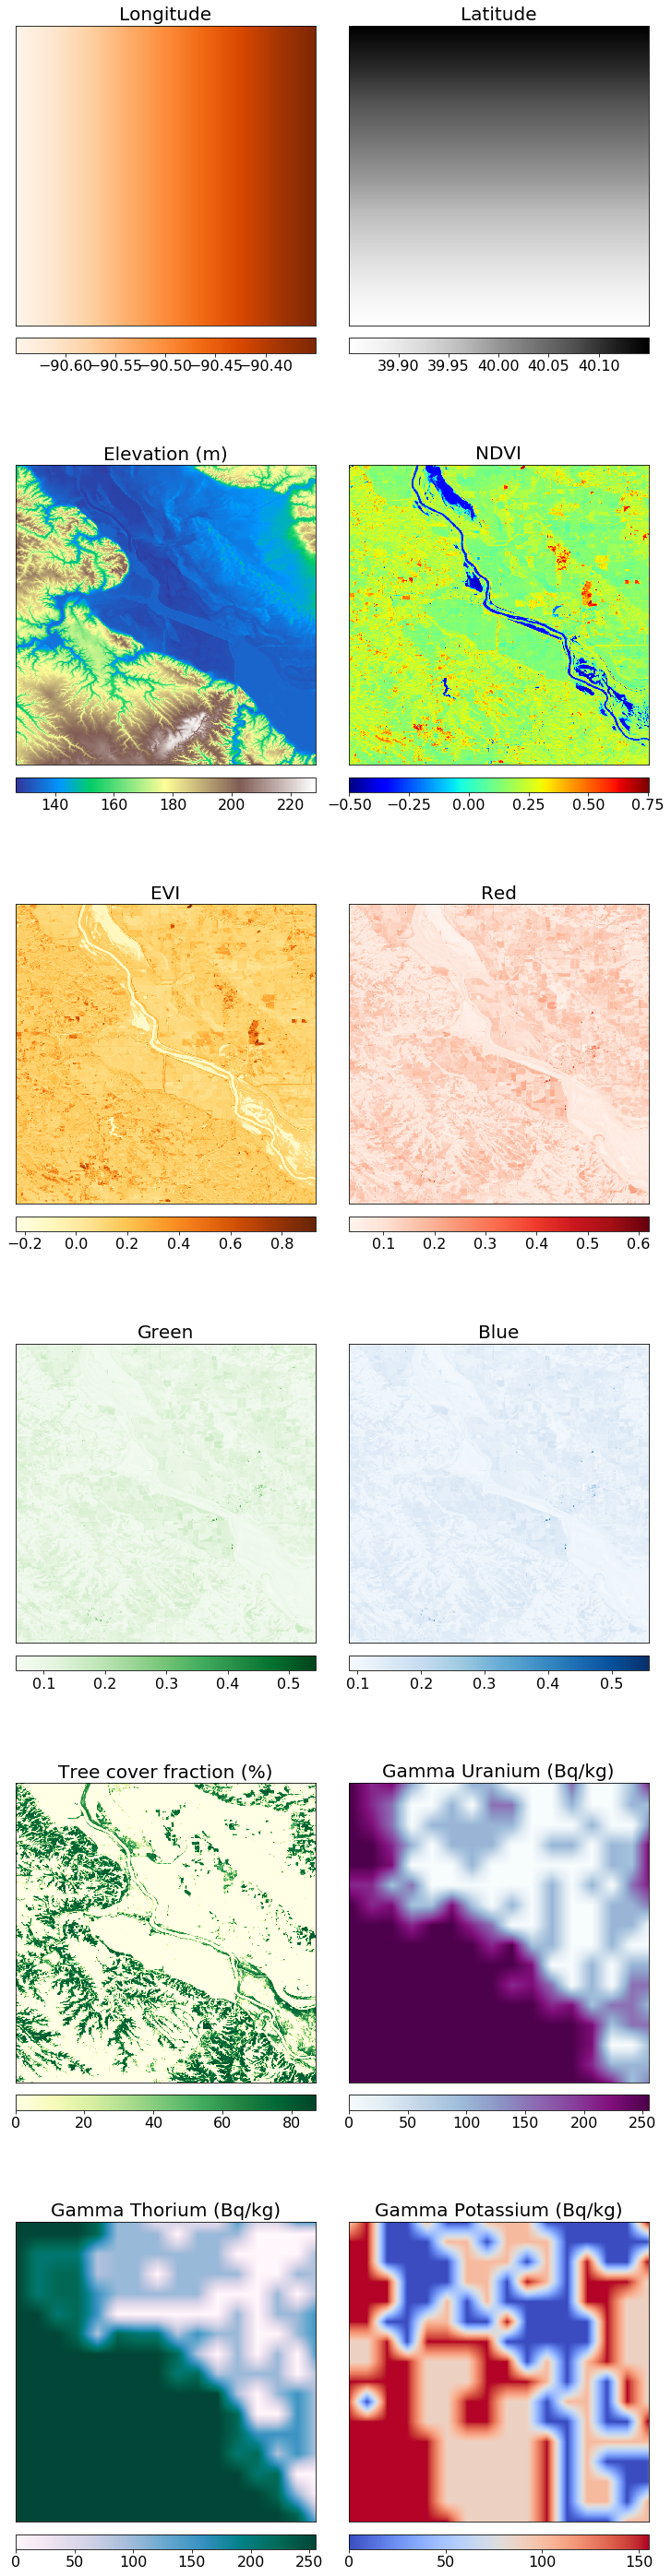

    Visually, elevation, NDVI, EVI, Red, Green, Blue, tree cover fraction data have the same spatial resolution. And the spatial resolution of gamma Uranium, gamma Thorium, and gamma Potassium is the same while it is much coarser compared to that of elevation.


In [8]:
import netCDF4 as nc
import numpy as np
fn = '/data/HW/HW3/HW3.nc'
ds = nc.Dataset(fn)
# A
data = {}
lon = ds['predictors'].variables['lon']
lat = ds['predictors'].variables['lat']
(lons,lats) = np.meshgrid(lon,lat)
#(lons,lats) = np.meshgrid(lats,lons)
data['lon'] = lons[:]
data['lat'] = np.flipud(lats[:])
data['ele'] = ds['predictors'].variables['elevation'][:]
data['ndvi'] = ds['predictors'].variables['ndvi'][:]
data['evi'] = ds['predictors'].variables['evi'][:]
data['red'] = ds['predictors'].variables['red'][:]
data['green'] = ds['predictors'].variables['green'][:]
data['blue'] = ds['predictors'].variables['blue'][:]
data['tree'] = ds['predictors'].variables['tree_cover_fraction'][:]
data['uran'] = ds['predictors'].variables['gamma_uranium'][:]
data['thor'] = ds['predictors'].variables['gamma_thorium'][:]
data['pota'] = ds['predictors'].variables['gamma_potassium'][:]

%matplotlib inline
import matplotlib.pyplot as plt
info = {'ele':{'cmap':'terrain','title':'Elevation (m)'},
        'ndvi':{'cmap':'jet','title':'NDVI'},
        'evi':{'cmap':'YlOrBr','title':'EVI'},
        'red':{'cmap':'Reds','title':'Red'},
        'green':{'cmap':'Greens','title':'Green'},
        'blue':{'cmap':'Blues','title':'Blue'},
        'tree':{'cmap':'YlGn','title':'Tree cover fraction (%)'},
        'uran':{'cmap':'BuPu','title':'Gamma Uranium (Bq/kg)'},
        'thor':{'cmap':'PuBuGn','title':'Gamma Thorium (Bq/kg)'},
        'pota':{'cmap':'coolwarm','title':'Gamma Potassium (Bq/kg)'},
        'lat':{'cmap':'Greys','title':'Latitude'},
        'lon':{'cmap':'Oranges','title':'Longitude'}}
plt.figure(figsize=(10,40))
i = 0
for var in data:
    i += 1
    plt.subplot(6,2,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[var],cmap=plt.get_cmap(info[var]['cmap']))
    cb = plt.colorbar(orientation='horizontal',pad=0.03)
    cb.ax.tick_params(labelsize=16)
    plt.title(info[var]['title'],fontsize=20)
plt.tight_layout()
plt.show()
print('    Visually, elevation, NDVI, EVI, Red, Green, Blue, tree cover fraction data have the same spatial resolution. And the spatial resolution of gamma Uranium, gamma Thorium, and gamma Potassium is the same while it is much coarser compared to that of elevation.')

In [9]:
# B
obs = {}
obs['lat'] = ds['observations'].variables['lat']
obs['lon'] = ds['observations'].variables['lon']
obs['tax'] = ds['observations'].variables['taxonomic_order']

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# X = [lat, lon, ele, ndvi, evi, red, green, blue, tree, uran, thor, pota]
X = []
for i in range(len(obs['lat'])):
    a = float(obs['lat'][i])
    aidx = find_nearest(lat,a)
    a1 = float(lat[aidx])
    b = float(obs['lon'][i])
    bidx = find_nearest(lon,b)
    b1 = float(lon[bidx])
    ele1 = float(data['ele'][1079 - aidx,bidx])
    ndvi1 = float(data['ndvi'][1079 - aidx,bidx])
    evi1 = float(data['evi'][1079 - aidx,bidx])
    red1 = float(data['red'][1079 - aidx,bidx])
    green1 = float(data['green'][1079 - aidx,bidx])
    blue1 = float(data['blue'][1079 - aidx,bidx])
    tree1 = float(data['tree'][1079 - aidx,bidx])
    uran1 = float(data['uran'][1079 - aidx,bidx])
    thor1 = float(data['thor'][1079 - aidx,bidx])
    pota1 = float(data['ele'][1079 - aidx,bidx])
    X.append([a1, b1, ele1, ndvi1, evi1, red1, green1, blue1, tree1, uran1, thor1, pota1])
X = np.array(X)

tax = []
for i in range(len(obs['tax'])):
    # 1 - mollisols; 2 - entisols; 3 - alfisols; 4 - inceptisols 
    if obs['tax'][i] == 'mollisols':
        tax.append(1)
    elif obs['tax'][i] == 'entisols':
        tax.append(2)
    elif obs['tax'][i] == 'alfisols':
        tax.append(3)
    elif obs['tax'][i] == 'inceptisols':
        tax.append(4)
y = np.array(tax)
y = y.reshape(y.shape[0],1)

In [10]:
# C
import sklearn.tree
nsamples = 77
idx = np.random.choice(y.size,nsamples,replace=False)
m = np.zeros(y.size).astype(np.int)
m[idx] = 1
m = m.astype(np.bool)
#Divide into training and validation
Xt = X[m,:]
yt = y[m]
Xv = X[~m,:]
yv = y[~m]
#Decision tree
clf = sklearn.tree.DecisionTreeClassifier(random_state=1)
#Fit the tree
clf = clf.fit(Xt,yt)
#Return the accuracy score
print('Accuracy score for the training dataset is',clf.score(Xt,yt))
print('Accuracy score for the test dataset is',clf.score(Xv,yv))
print('    The accuracy score for the test dataset is lower than the score for training dataset. It is normol because the decision tree is trained by training dataset and thus should fit the training dataset quite well while the validation estimate of the test error rate strongly depends on the the observations that are contained within the training set and which are included in the validation set. If the test dataset is far different than the training dataset, the accuracy score of test dataset will be very low. While if the test dataset is similar to the training dataset, the accuracy scores of the training dataset and the test dataset will be close.')

Accuracy score for the training dataset is 0.974025974025974
Accuracy score for the test dataset is 0.6842105263157895
    The accuracy score for the test dataset is lower than the score for training dataset. It is normol because the decision tree is trained by training dataset and thus should fit the training dataset quite well while the validation estimate of the test error rate strongly depends on the the observations that are contained within the training set and which are included in the validation set. If the test dataset is far different than the training dataset, the accuracy score of test dataset will be very low. While if the test dataset is similar to the training dataset, the accuracy scores of the training dataset and the test dataset will be close.


In [11]:
# D
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=1, shuffle=True)
scores_train = []
scores_test = []
for train_index, test_index in kf.split(X):
    Xt, Xv = X[train_index], X[test_index]
    yt, yv = y[train_index], y[test_index]
    #Decision tree
    clf = sklearn.tree.DecisionTreeClassifier(random_state=1)
    #Fit the tree
    clf = clf.fit(Xt,yt)
    scores_train.append(clf.score(Xt,yt))
    scores_test.append(clf.score(Xv,yv))
print('Average accuracy score for the training dataset: %f' % np.mean(scores_train))
print('Average accuracy score for the test dataset: %f' % np.mean(scores_test))
print('    The accuracy score for the training dataset using 10-fold cross validation of the decision tree is similar to that in the previous exercise. They are all close to 1.0. But, the accuracy score for the test dataset using 10-fold cross validation of the decision tree is much more stable than that in the previous exercise. The average accuracy score is around 0.6. However, in the previous exercise, the accuracy score for the test dataset fluctuates greatly, approximately from 0.4 to 0.75.')

Average accuracy score for the training dataset: 0.980398
Average accuracy score for the test dataset: 0.619583
    The accuracy score for the training dataset using 10-fold cross validation of the decision tree is similar to that in the previous exercise. They are all close to 1.0. But, the accuracy score for the test dataset using 10-fold cross validation of the decision tree is much more stable than that in the previous exercise. The average accuracy score is around 0.6. However, in the previous exercise, the accuracy score for the test dataset fluctuates greatly, approximately from 0.4 to 0.75.


In [12]:
# E
import warnings
warnings.filterwarnings('ignore')
import sklearn.ensemble
#Define the kfolds
kf = sklearn.model_selection.KFold(n_splits=10,random_state=1,shuffle=True)
# Bagging
clf = sklearn.ensemble.BaggingClassifier(random_state=1,n_estimators=100)
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=kf)
print('Bagging: %f' % np.mean(scores))
# Random Forest
clf = sklearn.ensemble.RandomForestClassifier(random_state=1,n_estimators=100)
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=kf)
print('Random Forest: %f' % np.mean(scores))
# Gradient Boosting
clf = sklearn.ensemble.GradientBoostingClassifier(random_state=1,n_estimators=100)
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=kf)
print('Gradient Boosting: %f' % np.mean(scores))

#Decision tree
clf = sklearn.tree.DecisionTreeClassifier(random_state=1)
scores = sklearn.model_selection.cross_val_score(clf,X,y,cv=kf)
print('Decision tree: %f' % np.mean(scores))
print('    In this case, the accuracy scores for these three different ensemble methods are similar, with the score for the Random Forest being the highest and the score for the Gradient Boosting being the lowest. The reason for the low score for the Gradiant Boosting may be its overfitting problem. But they are all higher than the accuracy score for the single decision tree.')

Bagging: 0.626250
Random Forest: 0.652500
Gradient Boosting: 0.625833
Decision tree: 0.619583
    In this case, the accuracy scores for these three different ensemble methods are similar, with the score for the Random Forest being the highest and the score for the Gradient Boosting being the lowest. The reason for the low score for the Gradiant Boosting may be its overfitting problem. But they are all higher than the accuracy score for the single decision tree.


In [13]:
# F
#Define the statistical method we want to use
clf = sklearn.tree.DecisionTreeClassifier(random_state=1)
#Initialize the bagging object with the define based estimator and number of trees to use (n_estimators)
#Tell it to compute the out of bag estimate
bclf = sklearn.ensemble.BaggingClassifier(random_state = 1,base_estimator=clf,n_estimators=100,oob_score=True)
#Fit the bagging classifier
bclf.fit(X,y)
#Print out of bag estimate of accuracy
print('Out of bag score: %f' % bclf.oob_score_)
print('    The out of bag score (0.666667) is similar to the score obtained from the cross validation (0.652500).')
print('    Out of bag (OOB) score is a way of validating the Random forest model. The OOB sample is the data that not used as the training data for some decision trees. After decision trees have been trained, each of the OOB samples is passed through every decision tree that did not contain the OOB sample in its bootstrap training data. Lastly, the OOB score is computed as the number of correctly predicted rows from the out of bag sample.')
print('    As compared to the validation score, OOB score is computed on data that was not necessarily used in the analysis of the model. Whereas for calculation validation score, a part of the original training dataset is actually set aside before training the models. Additionally, the OOB score is calculated using only a subset of decision trees not containing the OOB sample in their bootstrap training dataset. While the validation score is calculated using all the decision trees of the ensemble. The last but not the least, performing a k-fold cross validation with ensemble methods can get computationally expensive fairly quickly while OOB score is much easier to perform and can get very similar results to a k-fold cross validation.')      

Out of bag score: 0.666667
    The out of bag score (0.666667) is similar to the score obtained from the cross validation (0.652500).
    Out of bag (OOB) score is a way of validating the Random forest model. The OOB sample is the data that not used as the training data for some decision trees. After decision trees have been trained, each of the OOB samples is passed through every decision tree that did not contain the OOB sample in its bootstrap training data. Lastly, the OOB score is computed as the number of correctly predicted rows from the out of bag sample.
    As compared to the validation score, OOB score is computed on data that was not necessarily used in the analysis of the model. Whereas for calculation validation score, a part of the original training dataset is actually set aside before training the models. Additionally, the OOB score is calculated using only a subset of decision trees not containing the OOB sample in their bootstrap training dataset. While the validation

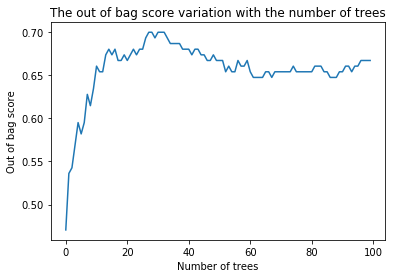

    Based on the plot, the optimal number of trees for this problem is around 30.


In [14]:
# G
scores = []
for i in range(100):
    j = i + 1
    clf = sklearn.tree.DecisionTreeClassifier(random_state=1)
    bclf = sklearn.ensemble.BaggingClassifier(random_state=1, base_estimator=clf,n_estimators=j,oob_score=True)
    bclf.fit(X,y)
    scores.append(bclf.oob_score_)
plt.plot(scores)
plt.xlabel('Number of trees')
plt.ylabel('Out of bag score')
plt.title('The out of bag score variation with the number of trees')
plt.show()
print('    Based on the plot, the optimal number of trees for this problem is around 30.')

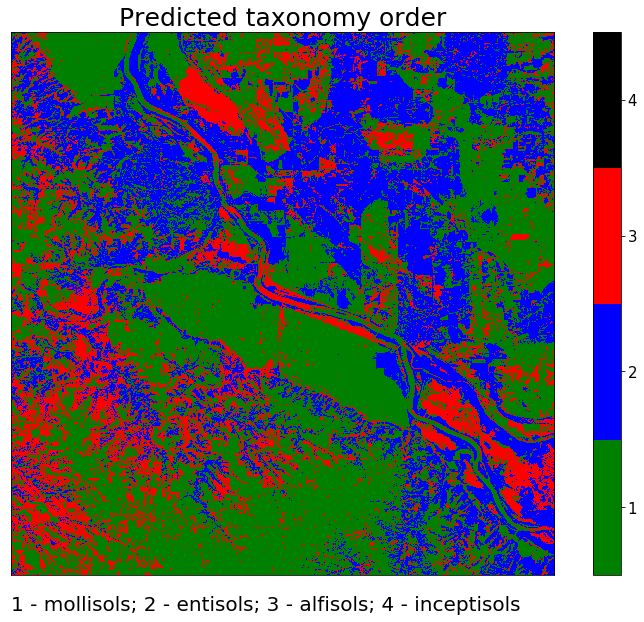

In [15]:
# H
from matplotlib.colors import ListedColormap, BoundaryNorm
#Random forest
clf = sklearn.ensemble.RandomForestClassifier(random_state=1,n_estimators=100)
#Fit the tree
clf = clf.fit(X,y)
#Assess the accuracy using the validation dataset
Xval = []
vars = ['lon','lat','ele','ndvi','evi','red','green','blue',
        'tree','uran','thor','pota']
for var in vars:
    tmp = data[var].reshape(data[var].size)
    Xval.append(tmp)
Xval = np.array(Xval).T
Ypred = clf.predict(Xval)

# make a color map of fixed colors
cmap = ListedColormap(['green','blue', 'red', 'black'])
bounds=[0.5,1.5,2.5,3.5,4.5]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(14,10))
plt.title('Predicted taxonomy order',fontsize=25)
img = plt.imshow(clf.predict(Xval).reshape(data['lat'].shape),
                    cmap=cmap, norm=norm)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[1, 2, 3, 4])
cb.ax.tick_params(labelsize=15)
plt.text(0,1150,'1 - mollisols; 2 - entisols; 3 - alfisols; 4 - inceptisols',fontsize=20)
plt.show()